<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/7506R_TP1_GRUPO24_CHP4_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# !pip install keras==2.12.0
# !pip uninstall tensorflow -y
# !pip install tensorflow==2.12.0

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
# from keras.utils.vis_utils import plot_model
# import visualkeras

np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [21]:
url_train = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/df_train_limpio.csv'
url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/df_test_limpio.csv'

ds_train_base = pd.read_csv(url_train)
ds_test_base = pd.read_csv(url_test)

ds_test = ds_test_base.copy()
df_test = pd.DataFrame(ds_test_base)

ds_train = ds_train_base.copy()
df_train = pd.DataFrame(ds_train_base)

In [22]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.layers import Dense


X = df_train.drop(['is_canceled', 'id'], axis=1)
y = df_train['is_canceled']

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=22)

# One hot encoding
enc = OneHotEncoder()
y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<ipython-input-22-72fc2a78716a>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
<ipython-input-22-72fc2a78716a>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()


In [23]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))

d_in=len(x_train.columns)
modelo_1 = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(5,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(cant_clases, activation='softmax')])



In [24]:
x_train_scaled.shape

(43339, 50)

In [25]:


modelo_1.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.01),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],
)

cant_epochs=100

historia_modelo_1=modelo_1.fit(x_train_scaled,y_train_encoder,epochs=cant_epochs,
                                         batch_size=50,verbose=False)

In [26]:
y_predic1 = modelo_1.predict(x_test_scaled)

581/581 [==============================] - 1s 1ms/step


In [27]:
y_predic1.shape

(18574, 2)

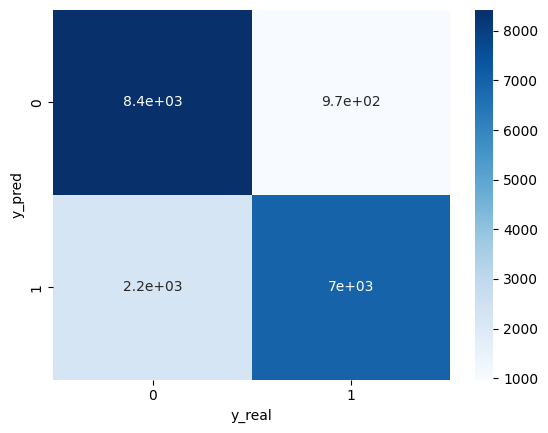

In [28]:

y_predic_cat_1 = np.where(y_predic1>0.7,1,0)
y_predic_cat_1= y_predic_cat_1[:, 1]

ds_validacion=pd.DataFrame(y_predic_cat_1 ,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [29]:
modelo_1.evaluate(x_test_scaled, y_test_encoder, verbose=2)

581/581 - 1s - loss: 0.3469 - auc: 0.9207 - 891ms/epoch - 2ms/step


[0.3468632996082306, 0.9206775426864624]

In [30]:
from google.colab import files
df_test_pred = df_test.drop(['is_canceled', 'id'], axis=1)

ids = df_test['id'].copy()

df_test_scal  = scaler.transform(df_test_pred)

prediccion = modelo_1.predict(df_test_scal)
prediccion_bin = np.where(prediccion > 0.7, 1, 0).astype(int)
prediccion_bin= prediccion_bin[:, 1]


# df_pred = pd.DataFrame({'id': ids, 'is_canceled': prediccion_bin})
# df_pred.to_csv('df_pred.csv', sep=',', index=False)
# files.download('df_pred.csv')

830/830 [==============================] - 1s 1ms/step
